In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from IPython.display import display

from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None

# Import Data

In [139]:
day_raw = pd.read_csv('data/day.csv')
hour_raw = pd.read_csv('data/hour.csv')

# Explore

In [66]:
hour_raw.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,norm_hr
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.253697,0.258703,0.243512,0.656712,0.261465,0.081650,0.143967,0.142643,0.141147,0.142413,0.142183,0.143104,0.502033
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.435139,0.437935,0.429214,0.474820,0.439445,0.273839,0.351066,0.349719,0.348184,0.349484,0.349248,0.350189,0.300626
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260870
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.521739
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.782609
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
hour_raw.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

## Month and Season are duplicative - We'll keep the one that correlates more with cnt/casual/registered bike shares

In [6]:
hour_raw.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


## Season has higher correlation than month, we'll use season

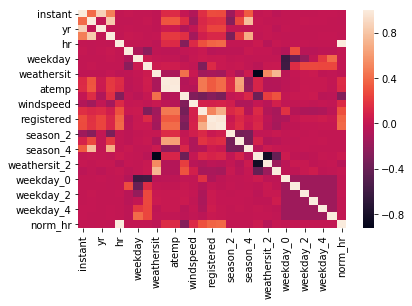

In [64]:
ax = sns.heatmap(hour_raw.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A60D0B908>,
      dtype=object)

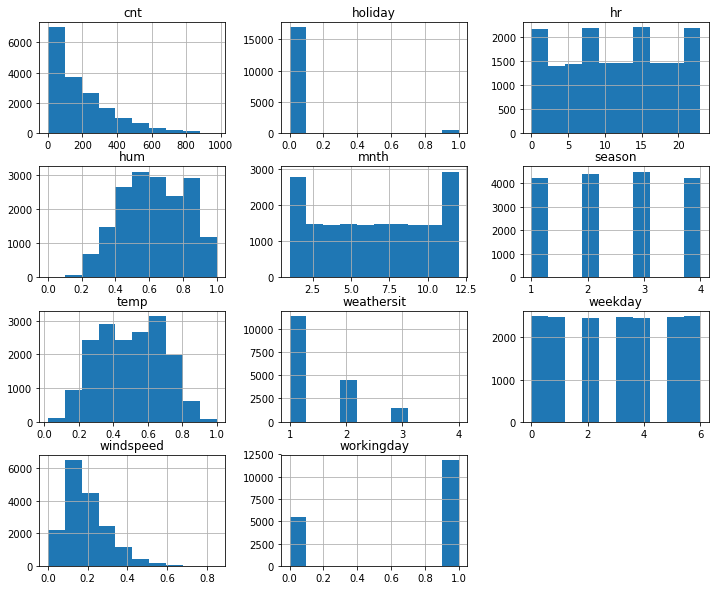

In [194]:
hour_raw[['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
         'windspeed', 'cnt']].hist(figsize=(12,10))

In [262]:
hour_raw['sqr_wind'] = hour_raw.windspeed**(1/2)

hour_raw['sqr_cnt'] = hour_raw.cnt**(1/5)
min(hour_raw.sqr_cnt)

1.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A64E4CAC8>,
      dtype=object)

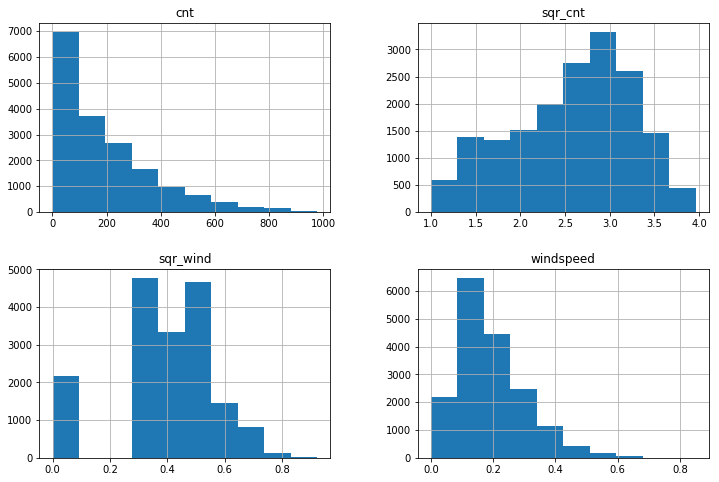

In [261]:
hour_raw[['windspeed', 'sqr_wind', 'sqr_cnt', 'cnt']].hist(figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A5D6DB978>,
      dtype=object)

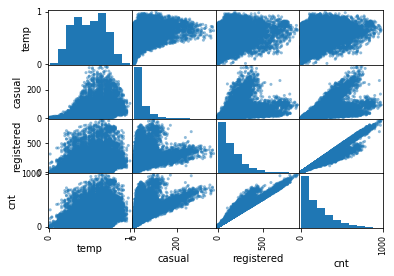

In [136]:
pd.plotting.scatter_matrix(hour_raw[['temp', 'casual','registered','cnt']])

# First Attempt - normalized hour data as norm_hr, hour is kept numeric

In [147]:
hour_raw = pd.read_csv('data/hour.csv')
#hour_raw['sqr_wind'] = hour_raw.windspeed**(1/2)

season_dummies = pd.get_dummies(data=hour_raw.season, prefix='season')
weathersit_dummies=pd.get_dummies(data=hour_raw.weathersit, prefix='weathersit')
weekday_dummies = pd.get_dummies(data=hour_raw.weekday, prefix='weekday')

hour_raw = pd.concat([hour_raw, season_dummies, weathersit_dummies, weekday_dummies], axis=1)
hour_raw.drop(columns=['season_1', 'weathersit_4', 'weekday_6'], inplace = True)

hour_raw['norm_hr'] = (hour_raw.hr-min(hour_raw.hr))/(max(hour_raw.hr)-min(hour_raw.hr))

lin_target = hour_raw.cnt
features_df = hour_raw.drop(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'weathersit', 'atemp', 'casual', 'registered', 'cnt'], axis=1)
predictor_int = sm.add_constant(features_df)

X_train, X_test, y_train, y_test = train_test_split(features_df, lin_target, test_size = 0.4)

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     337.0
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:42:00   Log-Likelihood:                -66807.
No. Observations:               10427   AIC:                         1.336e+05
Df Residuals:                   10409   BIC:                         1.338e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday         20.1187     53.140      0.379      0.705     -84.045     124.282
weekday         22.2080     24.515      0.906      0.365     -25.846      70.262
workingday      47.5722     52.642      0.904      0.366     -55.617     150.761
temp           391.8420     12.595     31.111      0.000     367.154     416.530
hum           -204.9491      9.195    -22.289      0.000    -222.973    -186.925
windspeed       19.2048     12.622      1.522      0.128      -5.537      43.946
season_2        11.2563      5.163      2.180      0.029       1.136      21.376
season_3       -24.8499      6.624     -3.751      0.000     -37.835     -11.865
season_4        55.7232      4.469     12.470      0.000      46.964      64.483
weathersit_1  -101.8276    146.909     -0.693      0.488    -389.798     186.143
weathersit_2   -89.0222    146.908     -0.606      0.545    -376.991     198.946
weathersit_3  -133.3499    146.964     -0.907      0.364    -421.427     154.727
weekday_0      116.6234    147.195      0.792      0.428    -171.907     405.154
weekday_1       54.4562     70.141      0.776      0.438     -83.034     191.947
weekday_2       36.0742     45.706      0.789      0.430     -53.519     125.667
weekday_3       14.3617     21.382      0.672      0.502     -27.551      56.274
weekday_4      -10.9077      5.213     -2.093      0.036     -21.126      -0.690
weekday_5      -26.2935     28.285     -0.930      0.353     -81.737      29.150
norm_hr        170.7632      5.092     33.536      0.000     160.782     180.744
==============================================================================
Omnibus:                     2502.559   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5663.614
Skew:                           1.365   Prob(JB):                         0.00
Kurtosis:                       5.363   Cond. No.                     2.16e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.3e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Predictors -> season, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, spring, summer, fall

# nth attempt - changed hours to dummy vars, transform wind speed, transform target

In [256]:
hour_raw = pd.read_csv('data/hour.csv')

season_dummies = pd.get_dummies(data=hour_raw.season, prefix='season')
weathersit_dummies=pd.get_dummies(data=hour_raw.weathersit, prefix='weathersit')
weekday_dummies = pd.get_dummies(data=hour_raw.weekday, prefix='weekday')
hr_dummies = pd.get_dummies(data=hour_raw.hr, prefix='hr')

hour_raw = pd.concat([hour_raw, season_dummies, weathersit_dummies, weekday_dummies, hr_dummies], axis=1)
hour_raw.drop(columns=['season_1', 'weathersit_4', 'weekday_6','hr_0'], inplace = True)

hour_raw['sqr_wind'] = hour_raw.windspeed**(1/2)
hour_raw['sqr_cnt'] = hour_raw.cnt**(1/5)


lin_target = hour_raw.sqr_cnt
features_df = hour_raw.drop(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'weathersit', 'atemp', 'casual', 'registered', 'cnt', 'hr', 'sqr_wind', 'sqr_cnt'], axis=1)
predictor_int = sm.add_constant(features_df)

X_train, X_test, y_train, y_test = train_test_split(predictor_int, lin_target, test_size = 0.2)

model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test)
print('test r2', r2_score(y_test, model.predict(X_test))) 
print('train r2', r2_score(y_train, model.predict(X_train)))

new_df = pd.DataFrame(model.predict(X_train)-y_train)
new_df.head(20)
#model.summary()

test r2 0.8044931749356975
train r2 0.7861150278440774


C:\Users\prayt\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,0
773,0.295246
3410,0.052052
14536,0.076879
13369,-0.263116
12665,-0.295463
5857,0.573502
10837,-0.403306
13702,0.420248
13276,-0.052770
2657,0.311519


## Need to transform results back to original form (x^(1/5))^5 = x 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A645CF2B0>]],
      dtype=object)

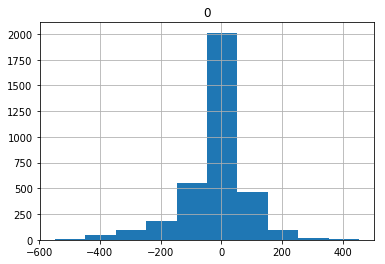

In [290]:
pd.DataFrame(model.predict(X_test)**5-y_test**5).hist()

## R^2 is much higher now - so is test!  R2 same for train/test, not overfit
## residuals are normal which is also good.  